In [30]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd '/content/gdrive/My Drive'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_pickle(path):
    return pd.read_pickle(path, compression=None)

In [3]:
model_name = 'vgg16_3step'
# model_name = 'densenet_3step'
# model_name = 'resnet50_3step'

df = pd.read_pickle('./results_depth/classes_results_' + model_name + '.pickle', compression=None)
# df['cat']
df

{'closest':               0.4        0.5        0.6
 ap      45.454545  27.272727  27.272727
 recall  40.000000  30.000000  30.000000,
 'cat':               0.4        0.5        0.6
 ap      27.272727  27.272727  27.272727
 recall  20.000000  20.000000  20.000000,
 'cow':               0.4        0.5        0.6
 ap      27.272727  27.272727  27.272727
 recall  30.000000  30.000000  20.000000,
 'dog':               0.4        0.5        0.6
 ap      27.272727  27.272727  27.272727
 recall  30.000000  20.000000  20.000000,
 'bird':               0.4        0.5        0.6
 ap      27.272727  18.181818  18.181818
 recall  30.000000  10.000000  10.000000,
 'horse':               0.4        0.5        0.6
 ap      27.272727  27.272727  27.272727
 recall  20.000000  20.000000  20.000000,
 'sheep':               0.4        0.5        0.6
 ap      27.272727  27.272727  27.272727
 recall  30.000000  30.000000  20.000000}

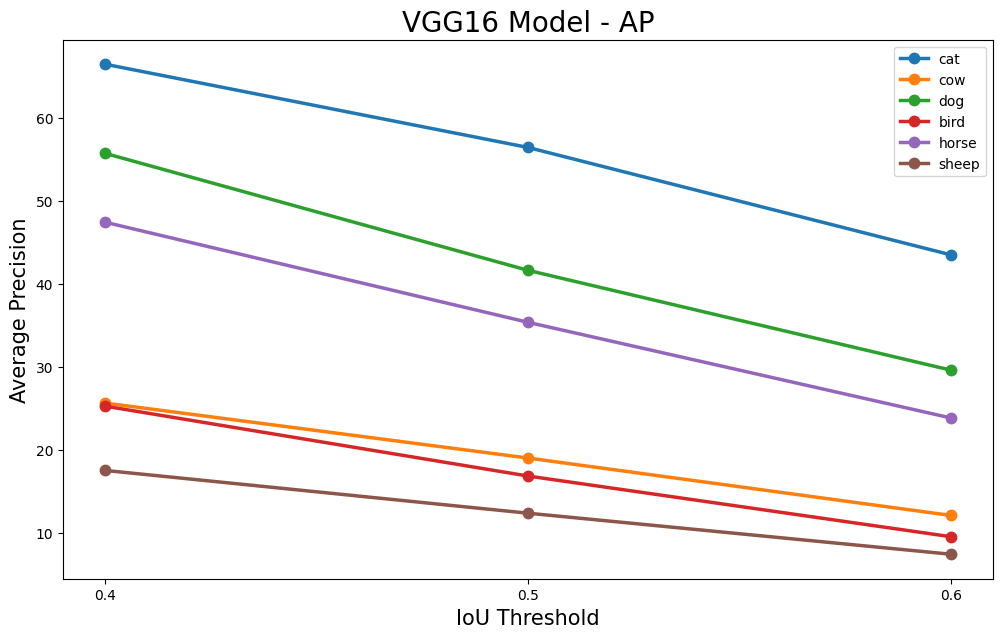

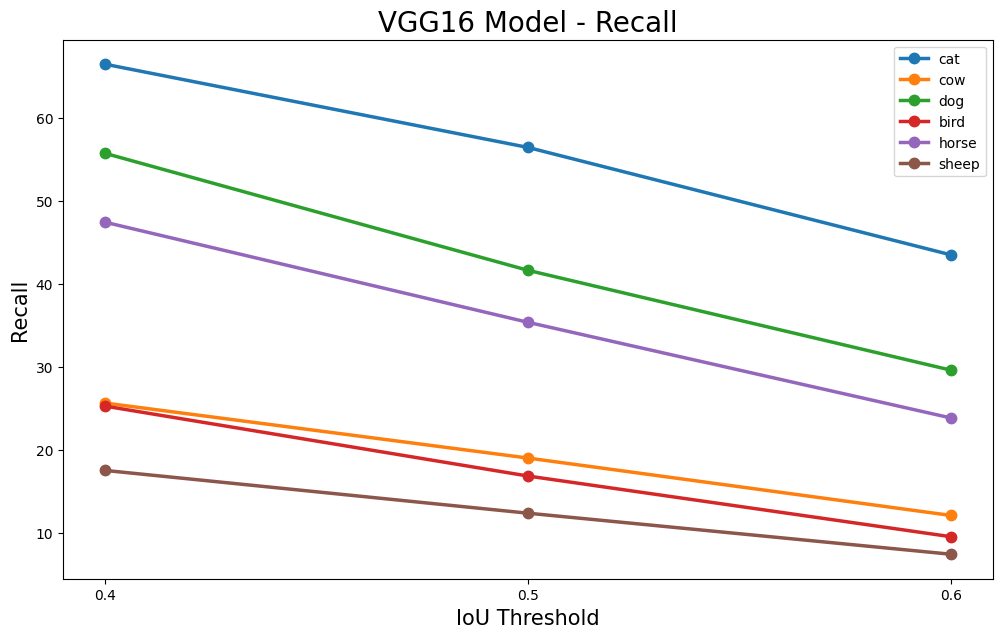

In [34]:
def plot_results(title, metric, index):
    plt.figure(figsize=(12, 7))
    for key in df.keys():
        plt.xticks(df[key].columns)
        plt.plot(df[key].columns, df[key].values.tolist()[index], label=key, marker='.', markersize=15, linewidth=2.5)

    plt.title(title, fontsize=20)
    plt.xlabel('IoU Threshold', fontsize=15)
    plt.ylabel(metric, fontsize=15)
    plt.legend()
    # plt.savefig('./media/' + title + '.png')
    plt.show()

plot_results('VGG16 Model - AP', 'Average Precision', 0)
plot_results('VGG16 Model - Recall', 'Recall', 1)

In [35]:
aar_model = [55.9, 40.4, 54.2, 38.4, 58.8]
tr_model = [53.0, 39.1, 52.2, 38.4, 52.7]
our_model = [df[key].values.tolist()[0][2] for key in df.keys()]

ap_df = pd.DataFrame(index=df.keys(), data={'AAR Model': aar_model, 'TR Model': tr_model, 'Our Model': our_model})
ap_df.plot(kind='bar', rot=0, xlabel='Class', ylabel='Average Precision', title='Average Precision Comparison', figsize=(12, 7));
plt.savefig('./media/comparison.png')

ValueError: Length of values (5) does not match length of index (6)